In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
covid_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

covid_data.drop(columns = ['fips', 'county'], inplace = True) # Remove columns fips and county  
covid_data.head()

,date,state,cases,deaths
0,2020-01-21,Washington,1,0.0
1,2020-01-22,Washington,1,0.0
2,2020-01-23,Washington,1,0.0
3,2020-01-24,Illinois,1,0.0
4,2020-01-24,Washington,1,0.0


In [409]:
covid_data.columns.isnull().any() # Check if there are any empty cells

False

In [5]:
# RETRIEVE COVID-19 DATA from 2020-01 to 2020-12-31
covid_data_2020 = covid_data[covid_data['date'] < '2021-01-01'] 

covid_data_2020.head()

(884737, 4)

In [6]:
# FIND TOTAL AMOUNT of CASES EACH DAY IN 2020
covid_data_2020_by_date = covid_data_2020.groupby('date')['cases', 'deaths'].sum().reset_index()
covid_data_2020_by_date.astype({'cases': int, 'deaths': int})
covid_data_2020_by_date.head()

/var/folders/q7/c9bgzbcx2d3609pccd6322ph0000gn/T/ipykernel_75413/1411962897.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid_data_2020_by_date = covid_data_2020.groupby('date')['cases', 'deaths'].sum().reset_index()


,date,cases,deaths
0,2020-01-21,1,0.0
1,2020-01-22,1,0.0
2,2020-01-23,1,0.0
3,2020-01-24,2,0.0
4,2020-01-25,3,0.0


In [9]:
# ASSIGN EACH DATE a VALUE, STARTING with the INITIAL DATE at 1
x = pd.Series(range(1, len(covid_data_2020_by_date['date']) + 1))[:, np.newaxis] 


y_cases = covid_data_2020_by_date['cases']
y_deaths = covid_data_2020_by_date['deaths']

/var/folders/q7/c9bgzbcx2d3609pccd6322ph0000gn/T/ipykernel_75413/3020094338.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = pd.Series(range(1, len(covid_data_2020_by_date['date']) + 1))[:, np.newaxis]


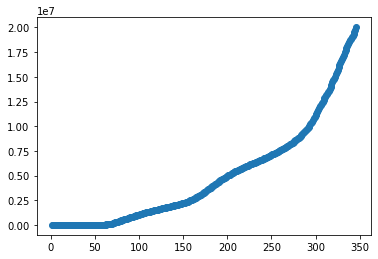

In [12]:
# SCATTER PLOT of COVID CASES IN 2020
plt.scatter(x, y_cases)

In [10]:
# CREATING POLYNOMIAL MODEL FOR COVID CASES IN 2020
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a polynomial model
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression(fit_intercept = True))

In [11]:
from sklearn.model_selection import cross_val_score

# IMPLEMENTING a 3 FOLD CROSS VALIDATION and CALCULATING THE MEAN ACCURACY SCORE
scores = cross_val_score(poly_model, x, y_cases, cv = 3)
scores.mean()

-27.160318675786158

In [14]:
# LINEAR REGRESSION MODEL FOR COVID DEATHS IN 2020
model = LinearRegression(fit_intercept = True) # Create a linear regression model

scores = cross_val_score(model, x, y_deaths, cv = 2) # Use two-fold cross validation and determining its mean value
scores.mean()

# Model is good

0.887479145740167

In [15]:
# DETERMINE Y-INTERCEPT and SLOPE FOR COVID DEATHS IN 2020
model.fit(x, y_deaths)

xfit = np.linspace(0, 350, 35)
yfit = model.predict(xfit[:, np.newaxis])

print(model.intercept_, model.coef_)

-36318.22573510936 [982.49056495]


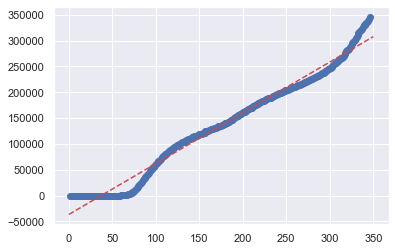

In [467]:
# SCATTER PLOT of COVID DEATHS IN 2020 WITH THE LINE OF BEST FIT

plt.plot(xfit, yfit, '--r')
plt.scatter(x, y_deaths)